In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,datasets

In [5]:
#Data loading
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_test.shape

(10000, 1)

In [29]:
#Reshaping the label columns into 1 dimension numpy array
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [30]:
#Function for plotting the images
def plot_image(X,y,index):
  classes=['airplane','automobile','bird','cat',' deer','dog','frog','horse','ship','truck']

  plt.figure(figsize=(15,1.5))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

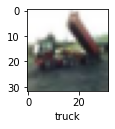

In [31]:
plot_image(X_train,y_train,2)

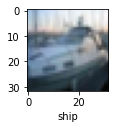

In [32]:
plot_image(X_test,y_test,2)

In [34]:
#Scaling the train and test images
X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [35]:
X_train_scaled[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [37]:
#Lets Build CNN Model
cnn=keras.models.Sequential([
                             layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                             layers.MaxPool2D((2,2)),

                             layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                             layers.MaxPool2D((2,2)),

                             layers.Flatten(),
                             layers.Dense(64,activation='relu'),
                             layers.Dense(32,activation='relu'),
                             layers.Dense(10,activation='softmax')])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [38]:
#Fitting the model
cnn.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.7537 - accuracy: 0.3556
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1879 - accuracy: 0.5804
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0334 - accuracy: 0.6367
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9482 - accuracy: 0.6714
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8696 - accuracy: 0.6974
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8123 - accuracy: 0.7154
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7600 - accuracy: 0.7359
Epoch 8/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7088 - accuracy: 0.7544
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6758 - accuracy: 0.7647
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [39]:
#Checking the model's performance on test data.
cnn.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0333 - accuracy: 0.6686


[1.033348798751831, 0.6686000227928162]

In [41]:
y_pred=cnn.predict(X_test)
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 7.8252454e-13, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [43]:
y_pred_class=[np.argmax(element) for element in y_pred]
y_pred_class[:5]

[8, 8, 0, 0, 3]

In [44]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

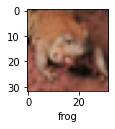

In [45]:
plot_image(X_test,y_test,5)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.28      0.86      0.43      1000
           1       0.61      0.55      0.58      1000
           2       0.68      0.08      0.14      1000
           3       0.44      0.10      0.16      1000
           4       0.53      0.10      0.17      1000
           5       0.37      0.60      0.46      1000
           6       0.86      0.16      0.26      1000
           7       0.52      0.67      0.58      1000
           8       0.41      0.44      0.42      1000
           9       0.44      0.59      0.51      1000

    accuracy                           0.41     10000
   macro avg       0.51      0.41      0.37     10000
weighted avg       0.51      0.41      0.37     10000



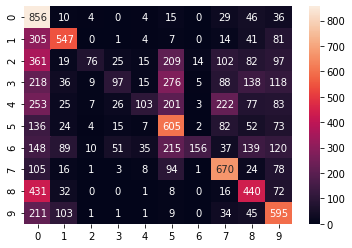

In [53]:
#Heatmap
import seaborn as sns
cm=confusion_matrix(y_test,y_pred_class)
sns.heatmap(cm,annot=True,fmt='d')

Though the accuracy and F1 score are quite low for this model, we can obtain the better performance by hyperparameter tunning which will be performed in the upcoming notebooks.